In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv("D:/Dixant/CDAC/Machine Learning/21-12-21/train_loan.csv")

In [3]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
dataset.shape

(614, 13)

In [6]:
df=dataset['Gender']
df=pd.get_dummies(df)
df=df['Male']
dataset=pd.concat([dataset,df], axis=1, join='inner')
dataset=dataset.drop('Gender',1)

In [7]:
df=dataset['Married']
df=pd.get_dummies(df)
df=df['Yes']
dataset=pd.concat([dataset,df], axis=1, join='inner')
dataset=dataset.drop('Married',1)

In [8]:
df=dataset['Education']
df=pd.get_dummies(df)
df=df['Graduate']
dataset=pd.concat([dataset,df], axis=1, join='inner')
dataset=dataset.drop('Education',1)

In [9]:
dataset.rename(columns={'Yes': 'Married'}, inplace=True)

In [10]:
df=dataset['Self_Employed']
df=pd.get_dummies(df)
df=df['Yes']
dataset=pd.concat([dataset,df], axis=1, join='inner')
dataset=dataset.drop('Self_Employed',1)

In [11]:
dataset.rename(columns={'Yes': 'Self_Employed'}, inplace=True)

In [12]:
df=dataset['Property_Area']
df=pd.get_dummies(df)
df=df['Urban']
dataset=pd.concat([dataset,df], axis=1, join='inner')
dataset=dataset.drop('Property_Area',1)

In [13]:
df=dataset['Loan_Status']
df=pd.get_dummies(df)
df=df['Y']
dataset=pd.concat([dataset,df], axis=1, join='inner')
dataset=dataset.drop('Loan_Status',1)

In [14]:
dataset.rename(columns={'Y': 'Loan_Status'}, inplace=True)

In [15]:
dataset['LoanAmount']=dataset['LoanAmount'].replace(0.0,np.NaN)

In [16]:
dataset['LoanAmount']=dataset['LoanAmount'].replace(np.NaN,dataset['LoanAmount'].mean())

In [17]:
dataset['Dependents']=dataset['Dependents'].replace('3+','3')

In [18]:
dataset['Dependents']=dataset['Dependents'].replace(np.NaN,dataset['Dependents'].mode()[0])

In [19]:
dataset['Loan_Amount_Term']=dataset['Loan_Amount_Term'].replace(np.NaN,dataset['Loan_Amount_Term'].mean())

In [20]:
dataset['Credit_History']=dataset['Credit_History'].replace(np.NaN,dataset['Credit_History'].mode()[0])

In [21]:
dataset['Credit_History']=dataset['Credit_History'].replace(np.NaN,dataset['Credit_History'].mode()[0])

In [22]:
dataset=dataset.drop('Loan_ID',1)

In [23]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Male,Married,Graduate,Self_Employed,Urban,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.855049,0.796417,0.648208,0.781759,0.133550,0.328990,0.687296
std,6109.041673,2926.248369,84.037468,64.372489,0.352339,0.402991,0.477919,0.413389,0.340446,0.470229,0.463973
min,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
print(dataset.groupby('Loan_Status').size())

Loan_Status
0    192
1    422
dtype: int64


In [25]:
X_train, X_test, y_train, y_test = train_test_split(dataset.loc[:, dataset.columns !='Loan_Status'],dataset['Loan_Status'], stratify=dataset['Loan_Status'], random_state=42)

In [26]:
print(y_train.value_counts())
print(y_test.value_counts())

1    316
0    144
Name: Loan_Status, dtype: int64
1    106
0     48
Name: Loan_Status, dtype: int64


In [27]:
feature_name=list(X_train.columns)
class_name = list(y_train.unique())
print(feature_name)
print(class_name)

['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Male', 'Married', 'Graduate', 'Self_Employed', 'Urban']
[0, 1]


# Decision Tree


In [28]:
clf = DecisionTreeClassifier()

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [29]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7467532467532467


## Decision Tree with Grid CV

In [30]:
list1=[]
for i in range(1,50):
    list1.append(i)

In [31]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth' : list1}

In [32]:
gridsearch = GridSearchCV(clf, param_grid,cv=4)

In [33]:
gridsearch.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [34]:
gridsearch.best_params_

{'max_depth': 1}

In [35]:
gridsearch.best_score_

0.7934782608695652

In [36]:
clf= DecisionTreeClassifier(max_depth=gridsearch.best_params_['max_depth'])
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [37]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8571428571428571


# Random Forest

In [38]:
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [39]:
y_predicted = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_predicted))

Accuracy: 0.8311688311688312


# Random Forest with Grid CV

In [40]:
list1=[]
for i in range(5,150):
    list1.append(i)

In [41]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators' : list1}

In [50]:
gridsearch = GridSearchCV(model, param_grid,cv=2)

In [51]:
gridsearch.fit(X_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(n_estimators=66),
             param_grid={'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                          16, 17, 18, 19, 20, 21, 22, 23, 24,
                                          25, 26, 27, 28, 29, 30, 31, 32, 33,
                                          34, ...]})

In [52]:
gridsearch.best_params_

{'n_estimators': 28}

In [53]:
gridsearch.best_score_

0.7695652173913043

In [54]:
model = RandomForestClassifier(n_estimators=gridsearch.best_params_['n_estimators'])
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=28)

In [55]:
y_predicted = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_predicted))

Accuracy: 0.8636363636363636


In [56]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

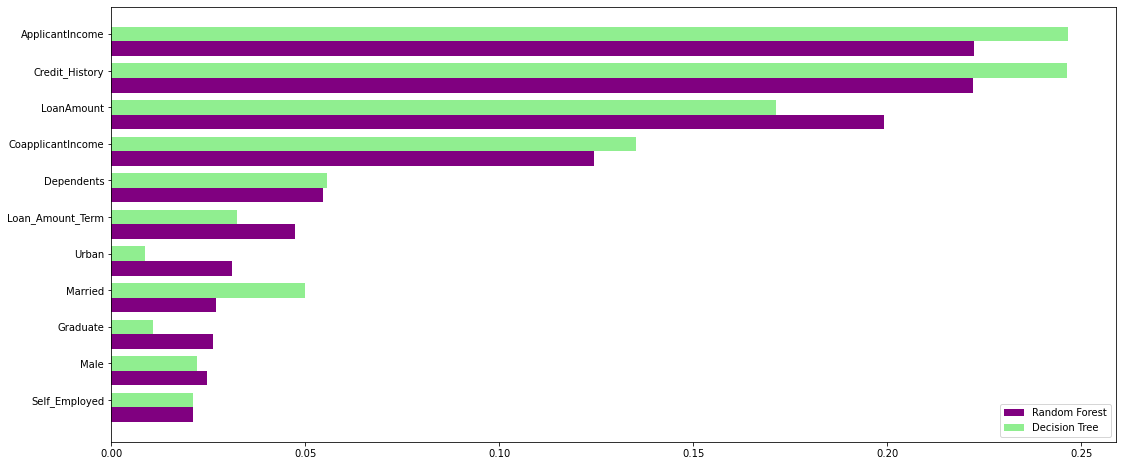

In [62]:
feature_importance=pd.DataFrame({
    'rfc':model.feature_importances_,
    'dt':clf.feature_importances_
},index=dataset.drop(columns=['Loan_Status']).columns)
feature_importance.sort_values(by='rfc',ascending=True,inplace=True)
 
index = np.arange(len(feature_importance))
fig, ax = plt.subplots(figsize=(18,8))
rfc_feature=ax.barh(index,feature_importance['rfc'],0.4,color='purple',label='Random Forest')
dt_feature=ax.barh(index+0.4,feature_importance['dt'],0.4,color='lightgreen',label='Decision Tree')
ax.set(yticks=index+0.4,yticklabels=feature_importance.index)
 
ax.legend()
plt.show()